In [117]:
import hvplot.pandas
import pandas as pd
import json
import requests
import matplotlib


In [118]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
url = "https://data.lacity.org/resource/2nrs-mtv8.json?"
limit = "&$limit=1000000"
token = "$$app_token=2chCzz50gH6DpOapebwdtsXcQ"
# params = {"token": "$$app_token=2chCzz50gH6DpOapebwdtsXcQ",
#           "limit": "&$limit=10000"
# }
response = requests.get(url,limit).json()

In [119]:
len(response)

925720

In [120]:
response

[{'dr_no': '190326475',
  'date_rptd': '2020-03-01T00:00:00.000',
  'date_occ': '2020-03-01T00:00:00.000',
  'time_occ': '2130',
  'area': '07',
  'area_name': 'Wilshire',
  'rpt_dist_no': '0784',
  'part_1_2': '1',
  'crm_cd': '510',
  'crm_cd_desc': 'VEHICLE - STOLEN',
  'vict_age': '0',
  'vict_sex': 'M',
  'vict_descent': 'O',
  'premis_cd': '101',
  'premis_desc': 'STREET',
  'status': 'AA',
  'status_desc': 'Adult Arrest',
  'crm_cd_1': '510',
  'crm_cd_2': '998',
  'location': '1900 S  LONGWOOD                     AV',
  'lat': '34.0375',
  'lon': '-118.3506'},
 {'dr_no': '200106753',
  'date_rptd': '2020-02-09T00:00:00.000',
  'date_occ': '2020-02-08T00:00:00.000',
  'time_occ': '1800',
  'area': '01',
  'area_name': 'Central',
  'rpt_dist_no': '0182',
  'part_1_2': '1',
  'crm_cd': '330',
  'crm_cd_desc': 'BURGLARY FROM VEHICLE',
  'mocodes': '1822 1402 0344',
  'vict_age': '47',
  'vict_sex': 'M',
  'vict_descent': 'O',
  'premis_cd': '128',
  'premis_desc': 'BUS STOP/LAYOVER

In [121]:
response_df = pd.DataFrame(response)

In [122]:
response_df.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4
0,190326475,2020-03-01T00:00:00.000,2020-03-01T00:00:00.000,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,...,998,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN
1,200106753,2020-02-09T00:00:00.000,2020-02-08T00:00:00.000,1800,01,Central,0182,1,330,BURGLARY FROM VEHICLE,...,998,1000 S FLOWER ST,34.0444,-118.2628,1822 1402 0344,NaN,NaN,NaN,NaN,NaN
2,200320258,2020-11-11T00:00:00.000,2020-11-04T00:00:00.000,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,NaN,1400 W 37TH ST,34.021,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN
3,200907217,2023-05-10T00:00:00.000,2020-03-10T00:00:00.000,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN
4,220614831,2022-08-18T00:00:00.000,2020-08-17T00:00:00.000,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,...,NaN,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN


In [123]:
#925720
response_df["dr_no"].count()

925720

In [124]:
response_df.columns

Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'part_1_2', 'crm_cd', 'crm_cd_desc', 'vict_age',
       'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc', 'status',
       'status_desc', 'crm_cd_1', 'crm_cd_2', 'location', 'lat', 'lon',
       'mocodes', 'weapon_used_cd', 'weapon_desc', 'cross_street', 'crm_cd_3',
       'crm_cd_4'],
      dtype='object')

In [125]:
response_df["lon"] = response_df["lon"].astype(float)
response_df["lat"] = response_df["lat"].astype(float)

In [126]:
response_df.dtypes

dr_no              object
date_rptd          object
date_occ           object
time_occ           object
area               object
area_name          object
rpt_dist_no        object
part_1_2           object
crm_cd             object
crm_cd_desc        object
vict_age           object
vict_sex           object
vict_descent       object
premis_cd          object
premis_desc        object
status             object
status_desc        object
crm_cd_1           object
crm_cd_2           object
location           object
lat               float64
lon               float64
mocodes            object
weapon_used_cd     object
weapon_desc        object
cross_street       object
crm_cd_3           object
crm_cd_4           object
dtype: object

In [127]:
response_df_formatted = response_df.copy()

In [128]:
response_df_formatted=response_df_formatted.loc[response_df_formatted["lon"] != 0]

In [129]:
response_df_formatted.loc[response_df_formatted["lat"] == 0]

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4


In [130]:
response_df_formatted['Year'] = pd.to_datetime(response_df_formatted['date_occ']).dt.strftime('%Y')
response_df_formatted = response_df_formatted.drop(['date_occ'], axis=1)

#year = year of occurrence

,dr_no,date_rptd,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,vict_age,...,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4,Year
0,190326475,2020-03-01T00:00:00.000,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,0,...,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN,2020
1,200106753,2020-02-09T00:00:00.000,1800,01,Central,0182,1,330,BURGLARY FROM VEHICLE,47,...,1000 S FLOWER ST,34.0444,-118.2628,1822 1402 0344,NaN,NaN,NaN,NaN,NaN,2020
2,200320258,2020-11-11T00:00:00.000,1700,03,Southwest,0356,1,480,BIKE - STOLEN,19,...,1400 W 37TH ST,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN,2020
3,200907217,2023-05-10T00:00:00.000,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,...,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN,2020
4,220614831,2022-08-18T00:00:00.000,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,28,...,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN,2020


In [201]:
pd.set_option('display.max_columns', None)

response_df_formatted.head(10)

,dr_no,date_rptd,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,status,status_desc,crm_cd_1,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4,Year
0,190326475,2020-03-01T00:00:00.000,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,0,M,O,101,STREET,AA,Adult Arrest,510,998,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN,2020
1,200106753,2020-02-09T00:00:00.000,1800,01,Central,0182,1,330,BURGLARY FROM VEHICLE,47,M,O,128,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330,998,1000 S FLOWER ST,34.0444,-118.2628,1822 1402 0344,NaN,NaN,NaN,NaN,NaN,2020
2,200320258,2020-11-11T00:00:00.000,1700,03,Southwest,0356,1,480,BIKE - STOLEN,19,X,X,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480,NaN,1400 W 37TH ST,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN,2020
3,200907217,2023-05-10T00:00:00.000,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,405,CLOTHING STORE,IC,Invest Cont,343,NaN,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN,2020
4,220614831,2022-08-18T00:00:00.000,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,28,M,H,102,SIDEWALK,IC,Invest Cont,354,NaN,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN,2020
5,231808869,2023-04-04T00:00:00.000,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,41,M,H,501,SINGLE FAMILY DWELLING,IC,Invest Cont,354,NaN,9900 COMPTON AV,33.9467,-118.2463,1822 0100 0930 0929,NaN,NaN,NaN,NaN,NaN,2020
6,230110144,2023-04-04T00:00:00.000,0900,01,Central,0182,2,354,THEFT OF IDENTITY,25,M,H,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,354,NaN,1100 S GRAND AV,34.0415,-118.2620,0930 0929,NaN,NaN,NaN,NaN,NaN,2020
7,220314085,2022-07-22T00:00:00.000,1110,03,Southwest,0303,2,354,THEFT OF IDENTITY,27,F,B,248,CELL PHONE STORE,IC,Invest Cont,354,NaN,2500 S SYCAMORE AV,34.0335,-118.3537,0100,NaN,NaN,NaN,NaN,NaN,2020
8,231309864,2023-04-28T00:00:00.000,1400,13,Newton,1375,2,354,THEFT OF IDENTITY,24,F,B,750,CYBERSPACE,IC,Invest Cont,354,NaN,1300 E 57TH ST,33.9911,-118.2521,0100,NaN,NaN,NaN,NaN,NaN,2020
9,211904005,2020-12-31T00:00:00.000,1220,19,Mission,1974,2,624,BATTERY - SIMPLE ASSAULT,26,M,H,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,624,NaN,9000 CEDROS AV,34.2336,-118.4535,0416,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",NaN,NaN,NaN,2020


In [131]:
response_df_formatted.count()

dr_no             923456
date_rptd         923456
time_occ          923456
area              923456
area_name         923456
rpt_dist_no       923456
part_1_2          923456
crm_cd            923456
crm_cd_desc       923456
vict_age          923456
vict_sex          800386
vict_descent      800376
premis_cd         923445
premis_desc       922897
status            923456
status_desc       923456
crm_cd_1          923445
crm_cd_2           67018
location          923456
lat               923456
lon               923456
mocodes           794128
weapon_used_cd    318868
weapon_desc       318868
cross_street      144822
crm_cd_3            2260
crm_cd_4              64
Year              923456
dtype: int64

In [132]:
map_plot_0 = response_df_formatted.hvplot.points(
    "lon",
    "lat",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    color="Year",
    title = "Crime by Coordinates",
    alpha = 0.5
)

In [133]:
# map_plot_0

In [134]:
y_value = response_df_formatted.groupby(["Year"]).count()


In [135]:
y_value.reset_index(inplace=True)

<Axes: xlabel='Year'>

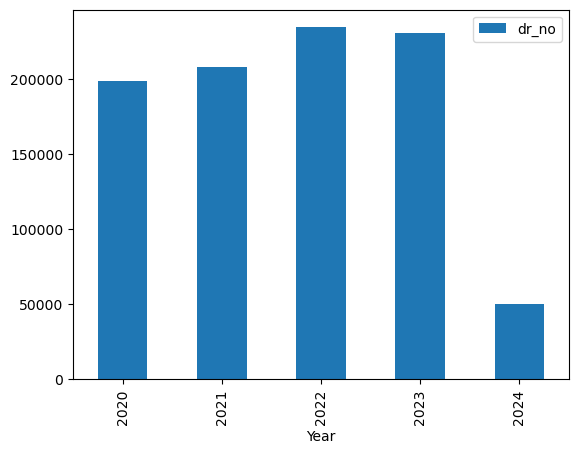

In [136]:
y_value.plot(kind="bar",x="Year",y="dr_no")

In [137]:
response_df_formatted.columns

Index(['dr_no', 'date_rptd', 'time_occ', 'area', 'area_name', 'rpt_dist_no',
       'part_1_2', 'crm_cd', 'crm_cd_desc', 'vict_age', 'vict_sex',
       'vict_descent', 'premis_cd', 'premis_desc', 'status', 'status_desc',
       'crm_cd_1', 'crm_cd_2', 'location', 'lat', 'lon', 'mocodes',
       'weapon_used_cd', 'weapon_desc', 'cross_street', 'crm_cd_3', 'crm_cd_4',
       'Year'],
      dtype='object')

In [144]:
crime_code_df=response_df_formatted[["crm_cd_desc","crm_cd","crm_cd_1","crm_cd_2","crm_cd_3","crm_cd_4","Year","area_name"]]
crime_code_df.describe()

,crm_cd_desc,crm_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,Year,area_name
count,923456,923456,923445,67018,2260,64,923456,923456
unique,139,139,141,126,37,6,5,21
top,VEHICLE - STOLEN,510,510,998,998,998,2022,Central
freq,99385,99385,99367,53532,1994,56,234868,62658


In [163]:
crime_code_df_area=crime_code_df.groupby(["area_name"]).count()
crime_code_df_year=crime_code_df.groupby(["Year"]).count()
crime_code_df_desc=crime_code_df.groupby(["crm_cd_desc"]).size()
crime_code_df_desc_1=crime_code_df.groupby(["crm_cd_desc"]).count()
crime_code_df_cd=crime_code_df.groupby(["crm_cd","crm_cd_desc"]).count()

In [140]:
response_df_formatted["crm_cd_desc"].value_counts()

crm_cd_desc
VEHICLE - STOLEN                                      99385
BATTERY - SIMPLE ASSAULT                              73020
THEFT OF IDENTITY                                     57054
BURGLARY FROM VEHICLE                                 57042
BURGLARY                                              56721
                                                      ...  
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)        5
INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)              5
FIREARMS RESTRAINING ORDER (FIREARMS RO)                  4
DISHONEST EMPLOYEE ATTEMPTED THEFT                        2
TRAIN WRECKING                                            1
Name: count, Length: 139, dtype: int64

In [151]:
# crime_code_df_desc.sort_values(ascending=False,inplace=True)
# top_10_crimes=crime_code_df_desc.head(10)
# Last_10_crime=crime_code_df_desc.tail(10)


<Axes: xlabel='crm_cd_desc'>

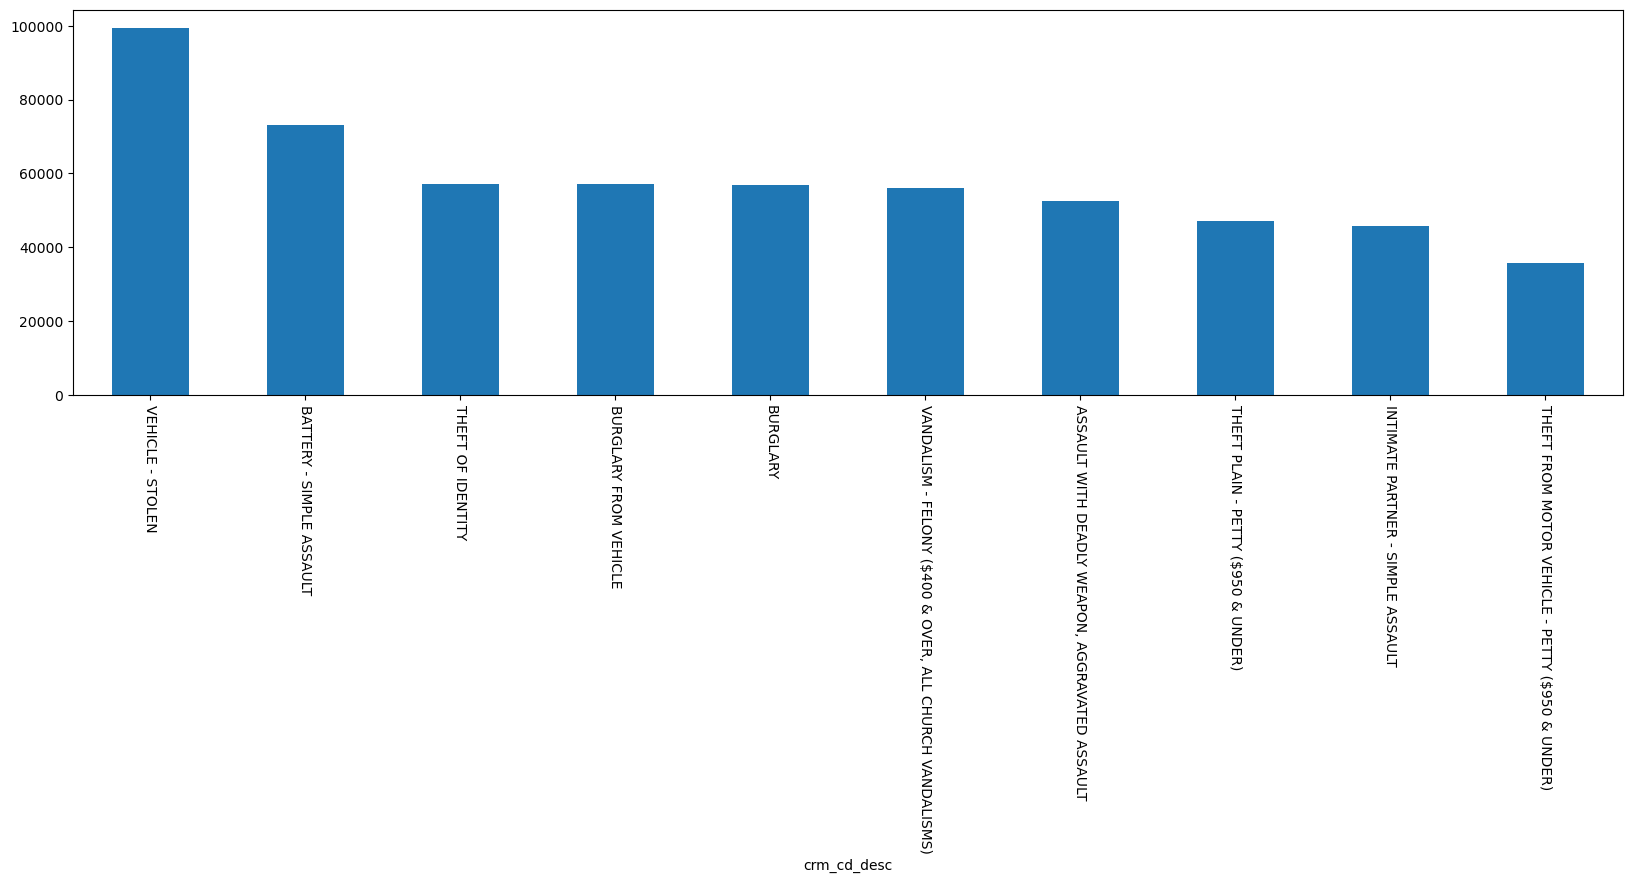

In [173]:
#top 10 crimes committed
crime_code_df_desc.sort_values(ascending=False).head(10).plot(kind="bar",figsize=(20,5),rot=-90)

<Axes: xlabel='crm_cd_desc'>

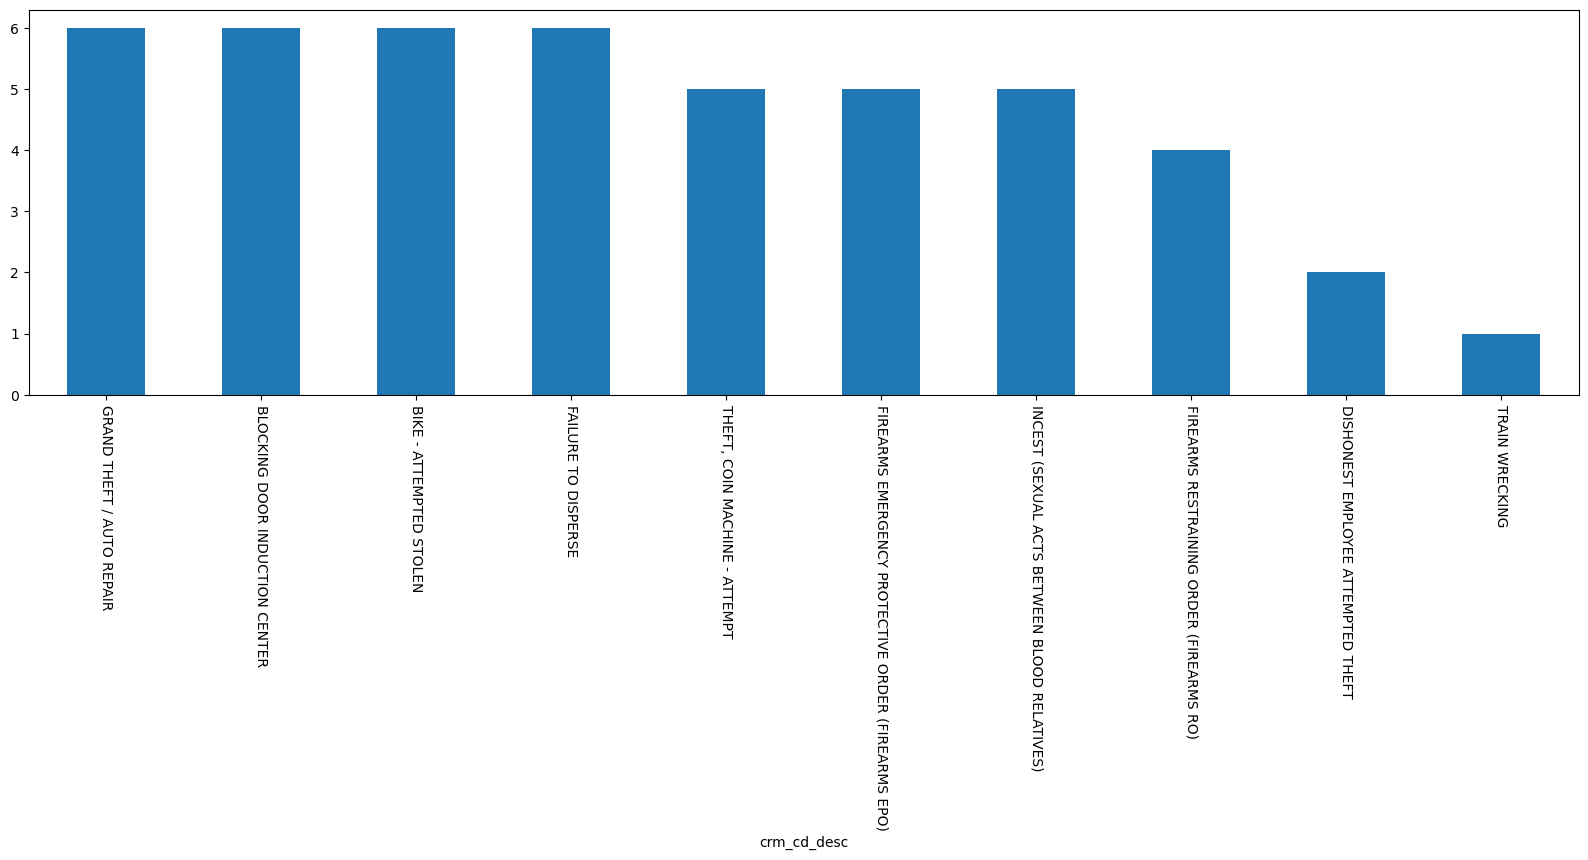

In [174]:
#Least 10 crimes committed

crime_code_df_desc.sort_values(ascending=False).tail(10).plot(kind="bar",figsize=(20,5),rot=-90)

<Axes: xlabel='area_name'>

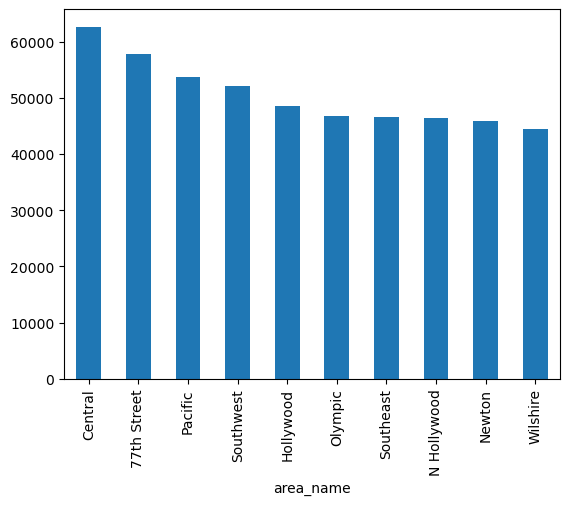

In [171]:
# crime_code_df_area.plot(kind="bar",y="crm_cd_1")
crime_code_df_area["crm_cd_desc"].sort_values(ascending=False).head(10).plot(kind="bar")


In [166]:
crime_code_df_desc_1


,crm_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,Year,area_name
crm_cd_desc,,,,,,,
ARSON,2395,2395,376,5,0,2395,2395
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,1057,1057,231,0,0,1057,1057
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",52472,52472,12362,251,5,52472,52472
ATTEMPTED ROBBERY,4750,4750,799,30,0,4750,4750
BATTERY - SIMPLE ASSAULT,73020,73020,1895,30,5,73020,73020
...,...,...,...,...,...,...,...
"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",2114,2114,34,0,0,2114,2114
VIOLATION OF COURT ORDER,6200,6200,126,0,0,6200,6200
VIOLATION OF RESTRAINING ORDER,11428,11428,329,0,0,11428,11428


In [168]:
crime_code_df_desc

crm_cd_desc
ARSON                                                        2395
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER                 1057
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              52472
ATTEMPTED ROBBERY                                            4750
BATTERY - SIMPLE ASSAULT                                    73020
                                                            ...  
VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)     2114
VIOLATION OF COURT ORDER                                     6200
VIOLATION OF RESTRAINING ORDER                              11428
VIOLATION OF TEMPORARY RESTRAINING ORDER                      902
WEAPONS POSSESSION/BOMBING                                     41
Length: 139, dtype: int64

In [190]:
response_df_formatted.groupby(["part_1_2"]).size()

part_1_2
1    545088
2    378368
dtype: int64

In [186]:
response_df_formatted.head(10)

,dr_no,date_rptd,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,vict_age,...,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4,Year
0,190326475,2020-03-01T00:00:00.000,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,0,...,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN,2020
1,200106753,2020-02-09T00:00:00.000,1800,01,Central,0182,1,330,BURGLARY FROM VEHICLE,47,...,1000 S FLOWER ST,34.0444,-118.2628,1822 1402 0344,NaN,NaN,NaN,NaN,NaN,2020
2,200320258,2020-11-11T00:00:00.000,1700,03,Southwest,0356,1,480,BIKE - STOLEN,19,...,1400 W 37TH ST,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN,2020
3,200907217,2023-05-10T00:00:00.000,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,...,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN,2020
4,220614831,2022-08-18T00:00:00.000,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,28,...,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN,2020
5,231808869,2023-04-04T00:00:00.000,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,41,...,9900 COMPTON AV,33.9467,-118.2463,1822 0100 0930 0929,NaN,NaN,NaN,NaN,NaN,2020
6,230110144,2023-04-04T00:00:00.000,0900,01,Central,0182,2,354,THEFT OF IDENTITY,25,...,1100 S GRAND AV,34.0415,-118.2620,0930 0929,NaN,NaN,NaN,NaN,NaN,2020
7,220314085,2022-07-22T00:00:00.000,1110,03,Southwest,0303,2,354,THEFT OF IDENTITY,27,...,2500 S SYCAMORE AV,34.0335,-118.3537,0100,NaN,NaN,NaN,NaN,NaN,2020
8,231309864,2023-04-28T00:00:00.000,1400,13,Newton,1375,2,354,THEFT OF IDENTITY,24,...,1300 E 57TH ST,33.9911,-118.2521,0100,NaN,NaN,NaN,NaN,NaN,2020
9,211904005,2020-12-31T00:00:00.000,1220,19,Mission,1974,2,624,BATTERY - SIMPLE ASSAULT,26,...,9000 CEDROS AV,34.2336,-118.4535,0416,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",NaN,NaN,NaN,2020
